In [1]:
import pandas as pd
from google.cloud import storage
import io

In [2]:
# Authenticate to Google Cloud
client = storage.Client()

In [3]:
bucket_name = "jkwon89"  # Replace with your bucket name
file_path = "Population Datasets/ACSDP1Y2023.DP05-Data.csv"  # Path to your CSV file within the bucket

In [4]:
# Get the blob (file) from the bucket
blob = client.bucket(bucket_name).blob(file_path)

# Download the file as a string and convert it to a file-like object
data = blob.download_as_string()
df = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [5]:
def load_data(path="path_link"):
    file_path = path
    blob = client.bucket(bucket_name).blob(file_path)  # Access the file in the bucket

    # Download the file as a string and convert it to a file-like object
    data = blob.download_as_string()
    df = pd.read_csv(io.StringIO(data.decode('utf-8')))  # Decode and convert to DataFrame

    return df

In [6]:
len(df.columns)

379

In [7]:
df.head(3)

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0090PM,DP05_0091PE,DP05_0091PM,DP05_0092PE,DP05_0092PM,DP05_0093PE,DP05_0093PM,DP05_0094PE,DP05_0094PM,Unnamed: 378
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,0100000US,United States,334914896,*****,165729373,34559,169185523,34560,98.0,0.1,...,0.1,(X),(X),241601029,(X),48.8,0.1,51.2,0.1,NaN
2,0500000US01003,"Baldwin County, Alabama",253507,*****,124518,799,128989,799,96.5,1.2,...,0.5,(X),(X),194664,(X),48.1,0.3,51.9,0.3,NaN


In [8]:
final_cols = [
"GEO_ID",
"NAME",
"DP05_0001E",
"DP05_0002PE",
"DP05_0003PE",
"DP05_0021PE",
"DP05_0024PE",
"DP05_0069PE",
"DP05_0070PE",
"DP05_0071PE",
"DP05_0072PE",
"DP05_0073PE",
"DP05_0074PE",
"DP05_0076PE"
]

df_population = df[final_cols]

In [9]:
df_population = df_population.drop(0)
df_population = df_population.drop(1)
df_population.head(3)

,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0069PE,DP05_0070PE,DP05_0071PE,DP05_0072PE,DP05_0073PE,DP05_0074PE,DP05_0076PE
2,0500000US01003,"Baldwin County, Alabama",253507,49.1,50.9,79.1,22.4,87.8,9.0,1.3,1.6,N,5.8,5.8
3,0500000US01015,"Calhoun County, Alabama",116429,48.3,51.7,78.9,19.1,74.9,23.9,1.3,1.2,N,2.9,4.8
4,0500000US01043,"Cullman County, Alabama",92016,48.9,51.1,77.7,19.6,96.4,1.8,1.3,0.8,N,6.9,5.1


In [48]:
df_population.shape

(854, 15)

In [10]:
df2 = load_data ("Population Datasets/ACSDP5Y2017.DP05-Data.csv")

<ipython-input-5-9a96a8450a6e>:7: DtypeWarning: Columns (2,4,6,8,10,12,13,14,15,16,18,20,22,24,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,50,52,54,56,58,60,62,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,142,144,145,146,147,148,149,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,188,190,191,192,193,194,196,198,200,202,204,205,206,207,208,210,211,212,213,216,218,219,220,222,223,224,225,226,228,230,232,236,238,240,244,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,306,307,308,309,310,311,312,313,3

In [49]:
df2_cols = [
"GEO_ID", "NAME",
"DP05_0001E",
"DP05_0002PE",
"DP05_0003PE",
"DP05_0021PE",
"DP05_0024PE",
"DP05_0064PE",
"DP05_0065PE",
"DP05_0066PE",
"DP05_0067PE",
"DP05_0068PE",
"DP05_0069PE",
"DP05_0071PE",
]
df2 = df2[df2_cols]
df2.shape

(3222, 14)

In [12]:
df_population_2 = df2.drop(df2.index[0:2])
df_population_2.head(3)

,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",55036,48.9,51.1,75.5,14.3,78.2,19.6,0.8,1.5,0.2,1.3,2.7
3,0500000US01003,"Baldwin County, Alabama",203360,48.9,51.1,77.9,19.0,87.8,9.9,1.4,1.3,0.0,1.3,4.4
4,0500000US01005,"Barbour County, Alabama",26201,53.3,46.7,79.0,17.4,47.3,48.3,0.5,0.9,0.0,3.8,4.2


In [13]:
df3 = load_data ("Population Datasets/ACSDP5Y2018.DP05-Data.csv")
df3.head(3)

<ipython-input-5-9a96a8450a6e>:7: DtypeWarning: Columns (2,4,6,8,10,12,13,14,15,16,18,20,22,24,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,50,52,54,56,58,60,62,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,142,144,145,146,147,148,149,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,188,190,191,192,193,194,196,198,200,202,204,205,206,207,208,210,211,212,213,216,218,219,220,222,223,224,225,226,228,230,232,236,238,240,244,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,306,307,308,309,310,311,312,313,3

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent Estimate!!Total housing units,Percent Margin of Error!!Total housing units,"Percent Estimate!!CITIZEN, VOTING AGE POPULATI...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent Estimate!!CITIZEN, VOTING AGE POPULATI...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent Estimate!!CITIZEN, VOTING AGE POPULATI...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,0100000US,United States,322903030,*****,158984190,6691,163918840,6689,97.0,0.1,...,0.1,(X),(X),228918197,(X),48.5,0.1,51.5,0.1,NaN
2,0500000US01001,"Autauga County, Alabama",55200,*****,26874,147,28326,147,94.9,1.0,...,0.5,(X),(X),41304,(X),47.8,0.3,52.2,0.3,NaN


In [14]:
df3_cols = [
"GEO_ID", "NAME",
"DP05_0001E",
"DP05_0002PE",
"DP05_0003PE",
"DP05_0021PE",
"DP05_0024PE",
"DP05_0064PE",
"DP05_0065PE",
"DP05_0066PE",
"DP05_0067PE",
"DP05_0068PE",
"DP05_0069PE",
"DP05_0071PE",
]
df3 = df3[df3_cols]
df_population_3 = df3.drop(df3.index[0:2])
df_population_3.head(3)


,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",55200,48.7,51.3,75.8,14.6,78.6,19.9,0.8,1.6,0.2,0.8,2.8
3,0500000US01003,"Baldwin County, Alabama",208107,48.6,51.4,78.1,19.5,87.8,9.8,1.5,1.4,0.0,1.3,4.5
4,0500000US01005,"Barbour County, Alabama",25782,53.1,46.9,78.9,18.0,48.3,48.5,1.2,0.6,0.0,3.1,4.3


In [15]:
df4 = load_data ("Population Datasets/ACSDP5Y2019.DP05-Data.csv")
df4.head(3)

<ipython-input-5-9a96a8450a6e>:7: DtypeWarning: Columns (2,4,6,8,10,12,13,14,15,16,18,20,22,24,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,50,52,54,56,58,60,62,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,142,144,145,146,147,148,149,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,188,190,191,192,193,194,196,198,200,202,204,205,206,207,208,210,211,212,213,216,218,219,220,222,223,224,225,226,228,230,232,236,238,240,244,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,306,307,308,309,310,311,312,313,3

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,0100000US,United States,324697795,*****,159886919,5817,164810876,5818,97.0,0.1,...,0.1,(X),(X),230959791,(X),48.5,0.1,51.5,0.1,NaN
2,0500000US01001,"Autauga County, Alabama",55380,*****,26934,166,28446,166,94.7,1.1,...,0.5,(X),(X),41647,(X),47.6,0.2,52.4,0.2,NaN


In [16]:
df4 = df4[df3_cols]
df_population_4 = df4.drop(df4.index[0:2])
df_population_4.head(3)

,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",55380,48.6,51.4,76.2,15.0,78.8,20.0,0.8,1.7,0.2,0.7,2.8
3,0500000US01003,"Baldwin County, Alabama",212830,48.6,51.4,78.3,20.0,87.8,9.7,1.6,1.4,0.0,1.3,4.6
4,0500000US01005,"Barbour County, Alabama",25361,52.9,47.1,79.1,18.6,47.6,48.4,1.1,0.7,0.1,3.7,4.4


In [17]:
df5 = load_data ("Population Datasets/ACSDP5Y2020.DP05-Data.csv")
df5.head(3)

<ipython-input-5-9a96a8450a6e>:7: DtypeWarning: Columns (2,4,6,8,10,12,13,14,15,16,18,20,22,24,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,50,52,54,56,58,60,62,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,142,144,145,146,147,148,149,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,188,190,191,192,193,194,196,198,200,202,204,205,206,207,208,210,211,212,213,216,218,219,220,222,223,224,225,226,228,230,232,236,238,240,244,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,306,307,308,309,310,311,312,313,3

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0002E,DP05_0002M,DP05_0003E,DP05_0003M,DP05_0004E,DP05_0004M,...,DP05_0085PM,DP05_0086PE,DP05_0086PM,DP05_0087PE,DP05_0087PM,DP05_0088PE,DP05_0088PM,DP05_0089PE,DP05_0089PM,Unnamed: 358
0,Geography,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Female,Margin of Error!!SEX AND AGE!!Total population...,Estimate!!SEX AND AGE!!Total population!!Sex r...,Margin of Error!!SEX AND AGE!!Total population...,...,Percent Margin of Error!!HISPANIC OR LATINO AN...,Percent!!Total housing units,Percent Margin of Error!!Total housing units,"Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Percent!!CITIZEN, VOTING AGE POPULATION!!Citiz...","Percent Margin of Error!!CITIZEN, VOTING AGE P...",NaN
1,0100000US,United States,326569308,*****,160818530,7991,165750778,8011,97.0,0.1,...,0.1,(X),(X),233440758,(X),48.5,0.1,51.5,0.1,NaN
2,0500000US01001,"Autauga County, Alabama",55639,*****,27052,167,28587,167,94.6,1.1,...,0.7,(X),(X),41959,(X),47.6,0.4,52.4,0.4,NaN


In [18]:
df5 = df5[df3_cols]
df_population_5 = df5.drop(df5.index[0:2])
df_population_5.head(3)

,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",55639,48.6,51.4,76.4,15.3,78.0,20.5,0.8,1.9,0.0,1.3,2.9
3,0500000US01003,"Baldwin County, Alabama",218289,48.5,51.5,78.5,20.5,87.9,9.3,1.5,1.4,0.3,2.3,4.6
4,0500000US01005,"Barbour County, Alabama",25026,52.6,47.4,79.1,19.1,47.9,48.5,1.3,0.6,0.1,4.0,4.4


In [19]:
df6 = load_data ("Population Datasets/ACSDP5Y2021.DP05-Data.csv")

df6 = df5[df3_cols]
df_population_6 = df6.drop(df6.index[0:2])
df_population_6.head(3)

<ipython-input-5-9a96a8450a6e>:7: DtypeWarning: Columns (2,4,6,8,10,12,13,14,15,16,18,20,22,24,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,50,52,54,56,58,60,62,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,128,129,130,131,132,133,134,135,136,137,138,139,140,142,144,145,146,147,148,149,150,151,152,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,182,184,188,190,191,192,193,194,196,198,200,202,204,205,206,207,208,210,211,212,213,216,218,219,220,222,223,224,225,226,228,230,232,236,238,240,244,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,306,307,308,309,310,311,312,313,3

,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",55639,48.6,51.4,76.4,15.3,78.0,20.5,0.8,1.9,0.0,1.3,2.9
3,0500000US01003,"Baldwin County, Alabama",218289,48.5,51.5,78.5,20.5,87.9,9.3,1.5,1.4,0.3,2.3,4.6
4,0500000US01005,"Barbour County, Alabama",25026,52.6,47.4,79.1,19.1,47.9,48.5,1.3,0.6,0.1,4.0,4.4


In [20]:
df7 = load_data ("Population Datasets/ACSDP5Y2022.DP05-Data.csv")

df7_cols = [
"GEO_ID", "NAME",
"DP05_0001E",
"DP05_0002PE",
"DP05_0003PE",
"DP05_0021PE",
"DP05_0024PE",
"DP05_0066PE",
"DP05_0067PE",
"DP05_0068PE",
"DP05_0069PE",
"DP05_0070PE",
"DP05_0071PE",
"DP05_0073PE"]

df7 = df7[df7_cols]
df_population_7 = df7.drop(df7.index[0:2])
df_population_7.head(3)

<ipython-input-5-9a96a8450a6e>:7: DtypeWarning: Columns (2,4,6,8,10,12,13,14,15,16,18,20,22,24,26,27,28,29,30,32,33,34,35,36,37,38,40,41,42,44,45,46,47,48,50,52,54,56,58,60,62,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,132,133,134,135,136,137,138,139,140,141,142,143,144,146,148,149,150,151,152,153,154,155,156,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,186,188,192,194,195,196,197,198,200,202,204,206,208,209,210,211,212,214,215,216,217,220,222,223,224,226,227,228,229,230,232,234,236,240,242,244,248,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,3

,GEO_ID,NAME,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0070PE,DP05_0071PE,DP05_0073PE
2,0500000US01001,"Autauga County, Alabama",58761,48.8,51.2,76.6,15.6,78.1,21.2,0.8,2.0,0.0,2.2,3.2
3,0500000US01003,"Baldwin County, Alabama",233420,48.9,51.1,78.8,21.2,88.3,9.4,1.6,1.6,0.3,3.7,4.8
4,0500000US01005,"Barbour County, Alabama",24877,52.1,47.9,79.3,19.8,47.3,48.1,1.5,0.7,0.1,5.2,4.8


In [21]:
df_population_2.insert(2, "YEAR", 2017)
df_population_2.head(2)

,GEO_ID,NAME,YEAR,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",2017,55036,48.9,51.1,75.5,14.3,78.2,19.6,0.8,1.5,0.2,1.3,2.7
3,0500000US01003,"Baldwin County, Alabama",2017,203360,48.9,51.1,77.9,19.0,87.8,9.9,1.4,1.3,0.0,1.3,4.4


In [22]:
def add_year(df, year):
    df.insert(2, "YEAR", year)
    return df

In [23]:
df_population_3 = add_year(df_population_3, 2018)
df_population_3.head(2)

,GEO_ID,NAME,YEAR,DP05_0001E,DP05_0002PE,DP05_0003PE,DP05_0021PE,DP05_0024PE,DP05_0064PE,DP05_0065PE,DP05_0066PE,DP05_0067PE,DP05_0068PE,DP05_0069PE,DP05_0071PE
2,0500000US01001,"Autauga County, Alabama",2018,55200,48.7,51.3,75.8,14.6,78.6,19.9,0.8,1.6,0.2,0.8,2.8
3,0500000US01003,"Baldwin County, Alabama",2018,208107,48.6,51.4,78.1,19.5,87.8,9.8,1.5,1.4,0.0,1.3,4.5


In [24]:
df_population_4 = add_year(df_population_4, 2019)
df_population_5 = add_year(df_population_5, 2020)
df_population_6 = add_year(df_population_6, 2021)
df_population_7 = add_year(df_population_7, 2022)
df_population = add_year(df_population, 2023)

In [25]:
# df_population_2 #2017
# df_population_3 #2018
# df_population_4 #2019
# df_population_5 #2020
# df_population_6 #2021
# df_population_7 #2022
# df_population #2023

In [26]:
new_col_names = ["geo_id", "name", "year",
  "total_population",
  "pct_male",
  "pct_female",
  "pct_age18over",
  "pct_age65over",
  "pct_race_white",
  "pct_race_black",
  "pct_race_native_amer",
 "pct_race_asian",
 "pct_race_pacific",
 "pct_race_others",
 "pct_hispanic"
]

In [27]:
import pandas as pd

dfs = [df_population_2, df_population_3, df_population_4,
       df_population_5, df_population_6, df_population_7, df_population]

# Function to rename columns
def rename_columns(df):
    df.columns = new_col_names
    return df

# Apply renaming to all DataFrames
dfs_renamed = [rename_columns(df) for df in dfs]

# Append all DataFrames row-wise while keeping only the first DataFrame's column names
combined_df = pd.concat(dfs_renamed, ignore_index=True)

In [35]:
combined_df.sort_values(by=["name", "year"], ascending=True).head(4)

,geo_id,name,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic
2316,0500000US45001,"Abbeville County, South Carolina",2017,24788,48.6,51.4,78.8,20.1,71.2,29.4,0.5,0.3,0.0,0.6,1.3
5536,0500000US45001,"Abbeville County, South Carolina",2018,24657,48.5,51.5,79.1,20.5,71.6,29.4,0.5,0.4,0.0,0.4,1.4
8756,0500000US45001,"Abbeville County, South Carolina",2019,24627,48.5,51.5,79.4,21.1,71.4,29.2,0.5,0.4,0.0,0.4,1.5
11977,0500000US45001,"Abbeville County, South Carolina",2020,24582,48.2,51.8,79.8,21.6,70.5,28.3,0.8,0.9,0.0,0.9,1.6


In [29]:
combined_df.describe()

,year
count,20178.000000
mean,2019.648479
std,1.813827
min,2017.000000
25%,2018.000000
50%,2020.000000
75%,2021.000000
max,2023.000000


In [30]:
combined_df.shape

(20178, 15)

## Join median income

In [36]:
median_2023 = load_data ("median_income/ACSST1Y2023.S1903-Data.csv")

In [37]:
median_2023.head(2)

,GEO_ID,NAME,S1903_C01_001E,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,0500000US01003,"Baldwin County, Alabama",105698,2634,90144,2774,N,N,N,N,...,11935,79428,10786,47986,11118,42665,14661,69142,73649,NaN


In [38]:
median_2023.columns.values[2] = "median_household_income"
median_2023.head(2)

,GEO_ID,NAME,median_household_income,S1903_C01_001M,S1903_C01_002E,S1903_C01_002M,S1903_C01_003E,S1903_C01_003M,S1903_C01_004E,S1903_C01_004M,...,S1903_C03_036M,S1903_C03_037E,S1903_C03_037M,S1903_C03_038E,S1903_C03_038M,S1903_C03_039E,S1903_C03_039M,S1903_C03_040E,S1903_C03_040M,Unnamed: 242
0,Geography,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,Estimate!!Number!!HOUSEHOLD INCOME BY RACE AND...,Margin of Error!!Number!!HOUSEHOLD INCOME BY R...,...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,Estimate!!Median income (dollars)!!NONFAMILY H...,Margin of Error!!Median income (dollars)!!NONF...,NaN
1,0500000US01003,"Baldwin County, Alabama",105698,2634,90144,2774,N,N,N,N,...,11935,79428,10786,47986,11118,42665,14661,69142,73649,NaN


In [39]:
median_2023 = median_2023.iloc[:, :3].drop(median_2023.index[0])


In [40]:
median_2023["year"] = 2023

In [42]:
median_2023.head(3)

,GEO_ID,NAME,median_household_income,year
1,0500000US01003,"Baldwin County, Alabama",105698,2023
2,0500000US01015,"Calhoun County, Alabama",46310,2023
3,0500000US01043,"Cullman County, Alabama",35961,2023


In [43]:
def process_median_income (path, year):
  df = load_data (path)
  df.columns.values[2] = "median_household_income"
  df = df.iloc[:, :3].drop(df.index[0])
  df["year"] = year
  print(df.head(2))
  return df

In [44]:
median_2017 = process_median_income("median_income/ACSST5Y2017.S1903-Data.csv", 2017)

           GEO_ID                     NAME median_household_income  year
1  0500000US01001  Autauga County, Alabama                   21054  2017
2  0500000US01003  Baldwin County, Alabama                   76133  2017


In [56]:
median_2018 = process_median_income("median_income/ACSST5Y2018.S1903-Data.csv", 2018)
median_2019 = process_median_income("median_income/ACSST5Y2019.S1903-Data.csv", 2019)
median_2020 = process_median_income("median_income/ACSST5Y2020.S1903-Data.csv", 2020)
median_2021 = process_median_income("median_income/ACSST5Y2021.S1903-Data.csv", 2021)
median_2022 = process_median_income("median_income/ACSST5Y2022.S1903-Data.csv", 2022)


           GEO_ID                     NAME median_household_income  year
1  0500000US01001  Autauga County, Alabama                   21115  2018
2  0500000US01003  Baldwin County, Alabama                   78622  2018
           GEO_ID                     NAME median_household_income  year
1  0500000US01001  Autauga County, Alabama                   21397  2019
2  0500000US01003  Baldwin County, Alabama                   80930  2019
           GEO_ID                     NAME median_household_income  year
1  0500000US01001  Autauga County, Alabama                   21559  2020
2  0500000US01003  Baldwin County, Alabama                   84047  2020
           GEO_ID                     NAME median_household_income  year
1  0500000US01001  Autauga County, Alabama                   21856  2021
2  0500000US01003  Baldwin County, Alabama                   87190  2021
           GEO_ID                     NAME median_household_income  year
1  0500000US01001  Autauga County, Alabama         

In [59]:
median_2018.shape

(3220, 4)

In [60]:
median_2018.sort_values(by=['NAME', 'year']).head(3)

,GEO_ID,NAME,median_household_income,year
2317,0500000US45001,"Abbeville County, South Carolina",9455,2018
1114,0500000US22001,"Acadia Parish, Louisiana",22564,2018
2821,0500000US51001,"Accomack County, Virginia",13401,2018


In [61]:
income_dfs = [median_2017, median_2018, median_2019,
       median_2020, median_2021, median_2022, median_2023]

combined_df_income = pd.concat(income_dfs, ignore_index=True)
combined_df_income.shape

(20178, 4)

In [62]:
combined_df_income.head()

,GEO_ID,NAME,median_household_income,year
0,0500000US01001,"Autauga County, Alabama",21054,2017
1,0500000US01003,"Baldwin County, Alabama",76133,2017
2,0500000US01005,"Barbour County, Alabama",9191,2017
3,0500000US01007,"Bibb County, Alabama",6916,2017
4,0500000US01009,"Blount County, Alabama",20690,2017


In [63]:
combined_df_income.sort_values(by=['NAME', 'year'])

,GEO_ID,NAME,median_household_income,year
2316,0500000US45001,"Abbeville County, South Carolina",9392,2017
5536,0500000US45001,"Abbeville County, South Carolina",9455,2018
8756,0500000US45001,"Abbeville County, South Carolina",9660,2019
11977,0500000US45001,"Abbeville County, South Carolina",9597,2020
15198,0500000US45001,"Abbeville County, South Carolina",9423,2021
...,...,...,...,...
5647,0500000US46137,"Ziebach County, South Dakota",744,2018
8867,0500000US46137,"Ziebach County, South Dakota",754,2019
12088,0500000US46137,"Ziebach County, South Dakota",775,2020
15309,0500000US46137,"Ziebach County, South Dakota",689,2021


In [66]:
merged_df = pd.merge(
    combined_df,
    combined_df_income,
    how='left',
    left_on=['geo_id', 'name',	'year'],  # Columns in the master dataset
    right_on=['GEO_ID', 'NAME', 'year']  # Corresponding columns in the new dataset
)

merged_df.drop(columns=['GEO_ID', 'NAME'], inplace=True)

merged_df.sort_values(by=['name', 'year']).head(5)

,geo_id,name,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income
2316,0500000US45001,"Abbeville County, South Carolina",2017,24788,48.6,51.4,78.8,20.1,71.2,29.4,0.5,0.3,0.0,0.6,1.3,9392
5536,0500000US45001,"Abbeville County, South Carolina",2018,24657,48.5,51.5,79.1,20.5,71.6,29.4,0.5,0.4,0.0,0.4,1.4,9455
8756,0500000US45001,"Abbeville County, South Carolina",2019,24627,48.5,51.5,79.4,21.1,71.4,29.2,0.5,0.4,0.0,0.4,1.5,9660
11977,0500000US45001,"Abbeville County, South Carolina",2020,24582,48.2,51.8,79.8,21.6,70.5,28.3,0.8,0.9,0.0,0.9,1.6,9597
15198,0500000US45001,"Abbeville County, South Carolina",2021,24582,48.2,51.8,79.8,21.6,70.5,28.3,0.8,0.9,0.0,0.9,1.6,9423


## Remote data

In [67]:
remote_2017 = load_data ("remote_data/ACSDT1Y2017.B08301-Data.csv")
remote_2017.head(1000)

,GEO_ID,NAME,B08301_001E,B08301_001M,B08301_002E,B08301_002M,B08301_003E,B08301_003M,B08301_004E,B08301_004M,...,B08301_017M,B08301_018E,B08301_018M,B08301_019E,B08301_019M,B08301_020E,B08301_020M,B08301_021E,B08301_021M,Unnamed: 44
0,Geography,Geographic Area Name,Estimate!!Total,Margin of Error!!Total,"Estimate!!Total!!Car, truck, or van","Margin of Error!!Total!!Car, truck, or van","Estimate!!Total!!Car, truck, or van!!Drove alone","Margin of Error!!Total!!Car, truck, or van!!Dr...","Estimate!!Total!!Car, truck, or van!!Carpooled","Margin of Error!!Total!!Car, truck, or van!!Ca...",...,Margin of Error!!Total!!Motorcycle,Estimate!!Total!!Bicycle,Margin of Error!!Total!!Bicycle,Estimate!!Total!!Walked,Margin of Error!!Total!!Walked,Estimate!!Total!!Other means,Margin of Error!!Total!!Other means,Estimate!!Total!!Worked at home,Margin of Error!!Total!!Worked at home,NaN
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,0500000US72113,"Ponce Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
834,0500000US72127,"San Juan Municipio, Puerto Rico",121867,4721,99586,4333,91458,4177,8128,1727,...,100,403,319,5851,1513,5220,1390,2947,995,NaN
835,0500000US72135,"Toa Alta Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,0500000US72137,"Toa Baja Municipio, Puerto Rico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
cols = ["GEO_ID",	"NAME",	"B08301_001E", "B08301_021E"]
remote_2017 =remote_2017[cols]
remote_2017.head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Worked at home
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN


In [69]:
remote_2017.shape

(838, 4)

In [70]:
remote_2017.dropna().shape

(391, 4)

In [71]:
remote_2017_clean = remote_2017.dropna()
remote_2017_clean=remote_2017_clean.drop(0)
remote_2017_clean.head(2)

,GEO_ID,NAME,B08301_001E,B08301_021E
7,0500000US01069,"Houston County, Alabama",45142,824
8,0500000US01073,"Jefferson County, Alabama",294862,10954


In [72]:
remote_2017_clean["B08301_021E"] = pd.to_numeric(remote_2017_clean["B08301_021E"], errors='coerce')
remote_2017_clean["B08301_001E"] = pd.to_numeric(remote_2017_clean["B08301_001E"], errors='coerce')

# Perform the division
remote_2017_clean["remote_ratio"] = remote_2017_clean["B08301_021E"] / remote_2017_clean["B08301_001E"]

In [73]:
remote_2017_clean["year"] = 2017

In [74]:
remote_2017_clean.head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E,remote_ratio,year
7,0500000US01069,"Houston County, Alabama",45142,824,0.018254,2017
8,0500000US01073,"Jefferson County, Alabama",294862,10954,0.037150,2017
12,0500000US01089,"Madison County, Alabama",174338,6161,0.035339,2017
22,0500000US02020,"Anchorage Municipality, Alaska",152841,5500,0.035985,2017
23,0500000US02090,"Fairbanks North Star Borough, Alaska",48883,1176,0.024057,2017


In [75]:
remote_2017_clean.sort_values(by="remote_ratio", ascending=False).head(20)

,GEO_ID,NAME,B08301_001E,B08301_021E,remote_ratio,year
169,0500000US13117,"Forsyth County, Georgia",112703,15432,0.136926,2017
88,0500000US08013,"Boulder County, Colorado",172732,23433,0.135661,2017
488,0500000US37021,"Buncombe County, North Carolina",130484,17025,0.130476,2017
58,0500000US06041,"Marin County, California",125024,15449,0.123568,2017
91,0500000US08035,"Douglas County, Colorado",179536,21289,0.118578,2017
572,0500000US40031,"Comanche County, Oklahoma",55428,6470,0.116728,2017
544,0500000US39055,"Geauga County, Ohio",48082,5225,0.108669,2017
65,0500000US06061,"Placer County, California",177146,18457,0.104191,2017
49,0500000US06017,"El Dorado County, California",81413,8420,0.103423,2017
585,0500000US41029,"Jackson County, Oregon",93761,9364,0.099871,2017


### remote data cleaning function

In [76]:
def process_remote_data (df, year):
  df = df[cols]
  df_clean = df.dropna()
  df_clean = df_clean.drop(0)

  # dtype cols
  df_clean["B08301_021E"] = pd.to_numeric(df_clean["B08301_021E"], errors='coerce')
  df_clean["B08301_001E"] = pd.to_numeric(df_clean["B08301_001E"], errors='coerce')

  # Perform the division
  df_clean["remote_ratio"] = df_clean["B08301_021E"] / df_clean["B08301_001E"]
  df_clean["year"] = year
  print(df_clean[["NAME", "remote_ratio"]].sort_values(by="remote_ratio", ascending=False).head(20))
  return df_clean

In [77]:
remote_2018 = load_data("remote_data/ACSDT1Y2018.B08301-Data.csv")
#ensure the col names are the same
remote_2018[cols].head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E
0,Geography,Geographic Area Name,Estimate!!Total,Estimate!!Total!!Worked at home
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN


In [78]:
remote_2018_clean = process_remote_data(remote_2018, 2018)

                                NAME  remote_ratio
58          Marin County, California      0.154406
91          Douglas County, Colorado      0.139154
49      El Dorado County, California      0.134566
88          Boulder County, Colorado      0.122538
169          Forsyth County, Georgia      0.115983
488  Buncombe County, North Carolina      0.113878
65         Placer County, California      0.109202
94          Larimer County, Colorado      0.102573
401         Gallatin County, Montana      0.100459
523      Wake County, North Carolina      0.099909
445      Santa Fe County, New Mexico      0.097862
731             Travis County, Texas      0.096301
170           Fulton County, Georgia      0.095953
482          Ulster County, New York      0.094988
93        Jefferson County, Colorado      0.094227
161             Cobb County, Georgia      0.090871
692             Collin County, Texas      0.090861
149          Volusia County, Florida      0.090313
591         Multnomah County, O

In [79]:
remote_2019 = load_data("remote_data/ACSDT1Y2019.B08301-Data.csv")
#ensure the col names are the same
remote_2019[cols].head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E
0,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Worked from home
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN


In [80]:
remote_2019_clean = process_remote_data(remote_2019, 2019)

                                   NAME  remote_ratio
367              Rice County, Minnesota      0.149758
58             Marin County, California      0.139589
92             Douglas County, Colorado      0.137324
89             Boulder County, Colorado      0.137255
170             Forsyth County, Georgia      0.123825
585            Deschutes County, Oregon      0.118969
745             Washington County, Utah      0.116645
490     Buncombe County, North Carolina      0.112330
733                Travis County, Texas      0.111250
525         Wake County, North Carolina      0.110423
516       Orange County, North Carolina      0.110009
514  New Hanover County, North Carolina      0.108708
738            Williamson County, Texas      0.107633
65            Placer County, California      0.107174
94           Jefferson County, Colorado      0.106968
171              Fulton County, Georgia      0.104786
140               Pasco County, Florida      0.104707
511  Mecklenburg County, Nor

In [81]:
remote_2021 = load_data("remote_data/ACSDT1Y2021.B08301-Data.csv")
#ensure the col names are the same
remote_2021[cols].head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E
0,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Worked from home
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN


In [82]:
remote_2021_clean = process_remote_data(remote_2021, 2021)

                                           NAME  remote_ratio
748                  Arlington County, Virginia      0.487848
110  District of Columbia, District of Columbia      0.482924
70             San Francisco County, California      0.455829
766                   Alexandria city, Virginia      0.408704
786                     King County, Washington      0.383371
758                    Loudoun County, Virginia      0.381042
752                    Fairfax County, Virginia      0.371822
314                 Montgomery County, Maryland      0.370659
468                   New York County, New York      0.364621
172                      Fulton County, Georgia      0.363443
89                     Boulder County, Colorado      0.362519
732                        Travis County, Texas      0.361670
57                     Marin County, California      0.358795
75               Santa Clara County, California      0.355219
527                 Wake County, North Carolina      0.351412
45      

In [83]:
remote_2022 = load_data("remote_data/ACSDT1Y2022.B08301-Data.csv")
#ensure the col names are the same
remote_2022[cols].head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E
0,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Worked from home
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN


In [84]:
remote_2022_clean = process_remote_data(remote_2022, 2022)

                                           NAME  remote_ratio
755                  Arlington County, Virginia      0.357842
172                     Forsyth County, Georgia      0.338790
111  District of Columbia, District of Columbia      0.337642
57                     Marin County, California      0.327292
70             San Francisco County, California      0.325280
89                     Boulder County, Colorado      0.320256
739                        Travis County, Texas      0.313957
773                   Alexandria city, Virginia      0.309455
92                     Douglas County, Colorado      0.308509
793                     King County, Washington      0.304618
517          Mecklenburg County, North Carolina      0.303446
765                    Loudoun County, Virginia      0.299964
173                      Fulton County, Georgia      0.298579
531                 Wake County, North Carolina      0.288667
699                        Collin County, Texas      0.286759
316     

In [85]:
remote_2023 = load_data("remote_data/ACSDT1Y2023.B08301-Data.csv")
#ensure the col names are the same
remote_2023[cols].head(5)

,GEO_ID,NAME,B08301_001E,B08301_021E
0,Geography,Geographic Area Name,Estimate!!Total:,Estimate!!Total:!!Worked from home
1,0500000US01003,"Baldwin County, Alabama",NaN,NaN
2,0500000US01015,"Calhoun County, Alabama",NaN,NaN
3,0500000US01043,"Cullman County, Alabama",NaN,NaN
4,0500000US01049,"DeKalb County, Alabama",NaN,NaN


In [86]:
remote_2023_clean = process_remote_data(remote_2023, 2023)

                                           NAME  remote_ratio
145                   St. Johns County, Florida      0.300529
771                    Loudoun County, Virginia      0.297487
518          Mecklenburg County, North Carolina      0.289382
761                  Arlington County, Virginia      0.285975
89                     Boulder County, Colorado      0.280613
745                        Travis County, Texas      0.274185
534                 Wake County, North Carolina      0.273461
111  District of Columbia, District of Columbia      0.272778
57                     Marin County, California      0.262711
91                      Denver County, Colorado      0.260453
173                      Fulton County, Georgia      0.259547
315                     Howard County, Maryland      0.258065
704                        Collin County, Texas      0.249404
366                    Carver County, Minnesota      0.244094
70             San Francisco County, California      0.244011
750     

In [87]:
remote_cols = ['GEO_ID', 'NAME', 'year', 'remote_ratio']


In [88]:
remote_dfs = [remote_2017_clean, remote_2018_clean, remote_2019_clean,
       remote_2021_clean, remote_2022_clean, remote_2023_clean]

combined_df_remote = pd.concat(remote_dfs, ignore_index=True)
print(combined_df_remote.shape)
combined_df_remote.head(10)

(2127, 6)


,GEO_ID,NAME,B08301_001E,B08301_021E,remote_ratio,year
0,0500000US01069,"Houston County, Alabama",45142,824,0.018254,2017
1,0500000US01073,"Jefferson County, Alabama",294862,10954,0.037150,2017
2,0500000US01089,"Madison County, Alabama",174338,6161,0.035339,2017
3,0500000US02020,"Anchorage Municipality, Alaska",152841,5500,0.035985,2017
4,0500000US02090,"Fairbanks North Star Borough, Alaska",48883,1176,0.024057,2017
5,0500000US02170,"Matanuska-Susitna Borough, Alaska",43316,2874,0.066350,2017
6,0500000US04003,"Cochise County, Arizona",48835,2075,0.042490,2017
7,0500000US04005,"Coconino County, Arizona",65740,3571,0.054320,2017
8,0500000US04013,"Maricopa County, Arizona",2035377,138932,0.068259,2017
9,0500000US04019,"Pima County, Arizona",435398,22902,0.052600,2017


In [89]:
combined_df_remote = combined_df_remote[remote_cols]

In [90]:
top_20_by_year = (
    combined_df_remote.groupby('year')
    .apply(lambda x: x.nlargest(20, 'remote_ratio'))  # Get top 20 counties per year
    .reset_index(drop=True)
)

# Step 2: Assign ranks within each year
top_20_by_year['rank'] = top_20_by_year.groupby('year')['remote_ratio'].rank(method='first', ascending=False).astype(int)

# Step 3: Concatenate county names with remote_ratio for each year
top_20_by_year['county_with_ratio'] = top_20_by_year['NAME'] + ' (' + top_20_by_year['remote_ratio'].round(2).astype(str) + ')'

# Step 4: Pivot the data so that each year is a column, with counties (and remote ratios) as values
pivoted = top_20_by_year.pivot(index='rank', columns='year', values='county_with_ratio')

# Step 5: Rename the columns to match your desired output
pivoted.columns = [f'county_{int(col)}' for col in pivoted.columns]

# Step 6: Reset the index to make 'rank' a column
final_table = pivoted.reset_index()

# Display the final table
final_table

<ipython-input-90-9a2d85d12fd6>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(20, 'remote_ratio'))  # Get top 20 counties per year


,rank,county_2017,county_2018,county_2019,county_2021,county_2022,county_2023
0,1,"Forsyth County, Georgia (0.14)","Marin County, California (0.15)","Rice County, Minnesota (0.15)","Arlington County, Virginia (0.49)","Arlington County, Virginia (0.36)","St. Johns County, Florida (0.3)"
1,2,"Boulder County, Colorado (0.14)","Douglas County, Colorado (0.14)","Marin County, California (0.14)","District of Columbia, District of Columbia (0.48)","Forsyth County, Georgia (0.34)","Loudoun County, Virginia (0.3)"
2,3,"Buncombe County, North Carolina (0.13)","El Dorado County, California (0.13)","Douglas County, Colorado (0.14)","San Francisco County, California (0.46)","District of Columbia, District of Columbia (0.34)","Mecklenburg County, North Carolina (0.29)"
3,4,"Marin County, California (0.12)","Boulder County, Colorado (0.12)","Boulder County, Colorado (0.14)","Alexandria city, Virginia (0.41)","Marin County, California (0.33)","Arlington County, Virginia (0.29)"
4,5,"Douglas County, Colorado (0.12)","Forsyth County, Georgia (0.12)","Forsyth County, Georgia (0.12)","King County, Washington (0.38)","San Francisco County, California (0.33)","Boulder County, Colorado (0.28)"
5,6,"Comanche County, Oklahoma (0.12)","Buncombe County, North Carolina (0.11)","Deschutes County, Oregon (0.12)","Loudoun County, Virginia (0.38)","Boulder County, Colorado (0.32)","Travis County, Texas (0.27)"
6,7,"Geauga County, Ohio (0.11)","Placer County, California (0.11)","Washington County, Utah (0.12)","Fairfax County, Virginia (0.37)","Travis County, Texas (0.31)","Wake County, North Carolina (0.27)"
7,8,"Placer County, California (0.1)","Larimer County, Colorado (0.1)","Buncombe County, North Carolina (0.11)","Montgomery County, Maryland (0.37)","Alexandria city, Virginia (0.31)","District of Columbia, District of Columbia (0.27)"
8,9,"El Dorado County, California (0.1)","Gallatin County, Montana (0.1)","Travis County, Texas (0.11)","New York County, New York (0.36)","Douglas County, Colorado (0.31)","Marin County, California (0.26)"
9,10,"Jackson County, Oregon (0.1)","Wake County, North Carolina (0.1)","Wake County, North Carolina (0.11)","Fulton County, Georgia (0.36)","King County, Washington (0.3)","Denver County, Colorado (0.26)"


In [92]:
merged_df_final = pd.merge(
    merged_df,
    combined_df_remote,
    how='left',
    left_on=['geo_id', 'name',	'year'],  # Columns in the master dataset
    right_on=['GEO_ID', 'NAME', 'year']  # Corresponding columns in the new dataset
)

merged_df_final.drop(columns=['GEO_ID', 'NAME'], inplace=True)

merged_df_final.sort_values(by=['name', 'year']).head(5)

,geo_id,name,year,total_population,pct_male,pct_female,pct_age18over,pct_age65over,pct_race_white,pct_race_black,pct_race_native_amer,pct_race_asian,pct_race_pacific,pct_race_others,pct_hispanic,median_household_income,remote_ratio
2316,0500000US45001,"Abbeville County, South Carolina",2017,24788,48.6,51.4,78.8,20.1,71.2,29.4,0.5,0.3,0.0,0.6,1.3,9392,NaN
5536,0500000US45001,"Abbeville County, South Carolina",2018,24657,48.5,51.5,79.1,20.5,71.6,29.4,0.5,0.4,0.0,0.4,1.4,9455,NaN
8756,0500000US45001,"Abbeville County, South Carolina",2019,24627,48.5,51.5,79.4,21.1,71.4,29.2,0.5,0.4,0.0,0.4,1.5,9660,NaN
11977,0500000US45001,"Abbeville County, South Carolina",2020,24582,48.2,51.8,79.8,21.6,70.5,28.3,0.8,0.9,0.0,0.9,1.6,9597,NaN
15198,0500000US45001,"Abbeville County, South Carolina",2021,24582,48.2,51.8,79.8,21.6,70.5,28.3,0.8,0.9,0.0,0.9,1.6,9423,NaN


In [93]:
merged_df_final.shape

(20178, 17)

In [94]:
# export CSV to bucket

export_file_path = "dva_census_final_2024.csv"
csv_buffer = io.StringIO()

merged_df_final.to_csv(csv_buffer, index=False)  # Convert DataFrame to CSV without saving locally
bucket = client.bucket(bucket_name)

# Create a new blob (object) in the bucket
blob = bucket.blob(export_file_path)

# Upload the CSV to the bucket from the in-memory buffer
blob.upload_from_string(csv_buffer.getvalue(), content_type='text/csv')

print(f"File uploaded to {export_file_path} in bucket {bucket_name}.")

File uploaded to dva_census_final_2024.csv in bucket jkwon89.


# EDA
## Remote by State Viz

In [95]:
remote_state = load_data("remote_data/remote_data_bystate.csv")


In [96]:
import seaborn as sns

In [98]:
remote_state.head(10)

,state,year,Total,WFH,remote ratio
0,Alabama,2017,"2,041,619","68,872",0.033734
1,Alaska,2017,"351,282","15,984",0.045502
2,Arizona,2017,"3,086,150","193,915",0.062834
3,Arkansas,2017,"1,281,666","47,156",0.036793
4,California,2017,"18,320,629","1,092,887",0.059653
5,Colorado,2017,"2,886,978","244,103",0.084553
6,Connecticut,2017,"1,778,000","91,174",0.051279
7,Delaware,2017,"430,780","22,227",0.051597
8,District of Columbia,2017,"375,380","27,667",0.073704
9,Florida,2017,"9,355,081","574,506",0.061411


In [100]:
new_cols = ['state', 'year', 'total', 'wft', 'remote_ratio']
remote_state.columns = new_cols

In [103]:
remote_state_byyear = remote_state.pivot(index='state', columns='year', values='remote_ratio')
remote_state_byyear.columns = [f'year_{int(col)}' for col in remote_state_byyear.columns]
remote_state_byyear = remote_state_byyear.reset_index()

remote_state_byyear.head(4)

,state,year_2017,year_2018,year_2019,year_2021,year_2022,year_2023
0,Alabama,0.033734,0.034526,0.033945,0.096402,0.088630,0.087670
1,Alaska,0.045502,0.052723,0.043283,0.103122,0.094562,0.090036
2,Arizona,0.062834,0.067629,0.075792,0.207445,0.191505,0.174843
3,Arkansas,0.036793,0.037479,0.035170,0.097395,0.087732,0.086940


In [117]:
remote_state_byyear["total_change"] = (remote_state_byyear['year_2023']-remote_state_byyear['year_2017']) / remote_state_byyear['year_2017']

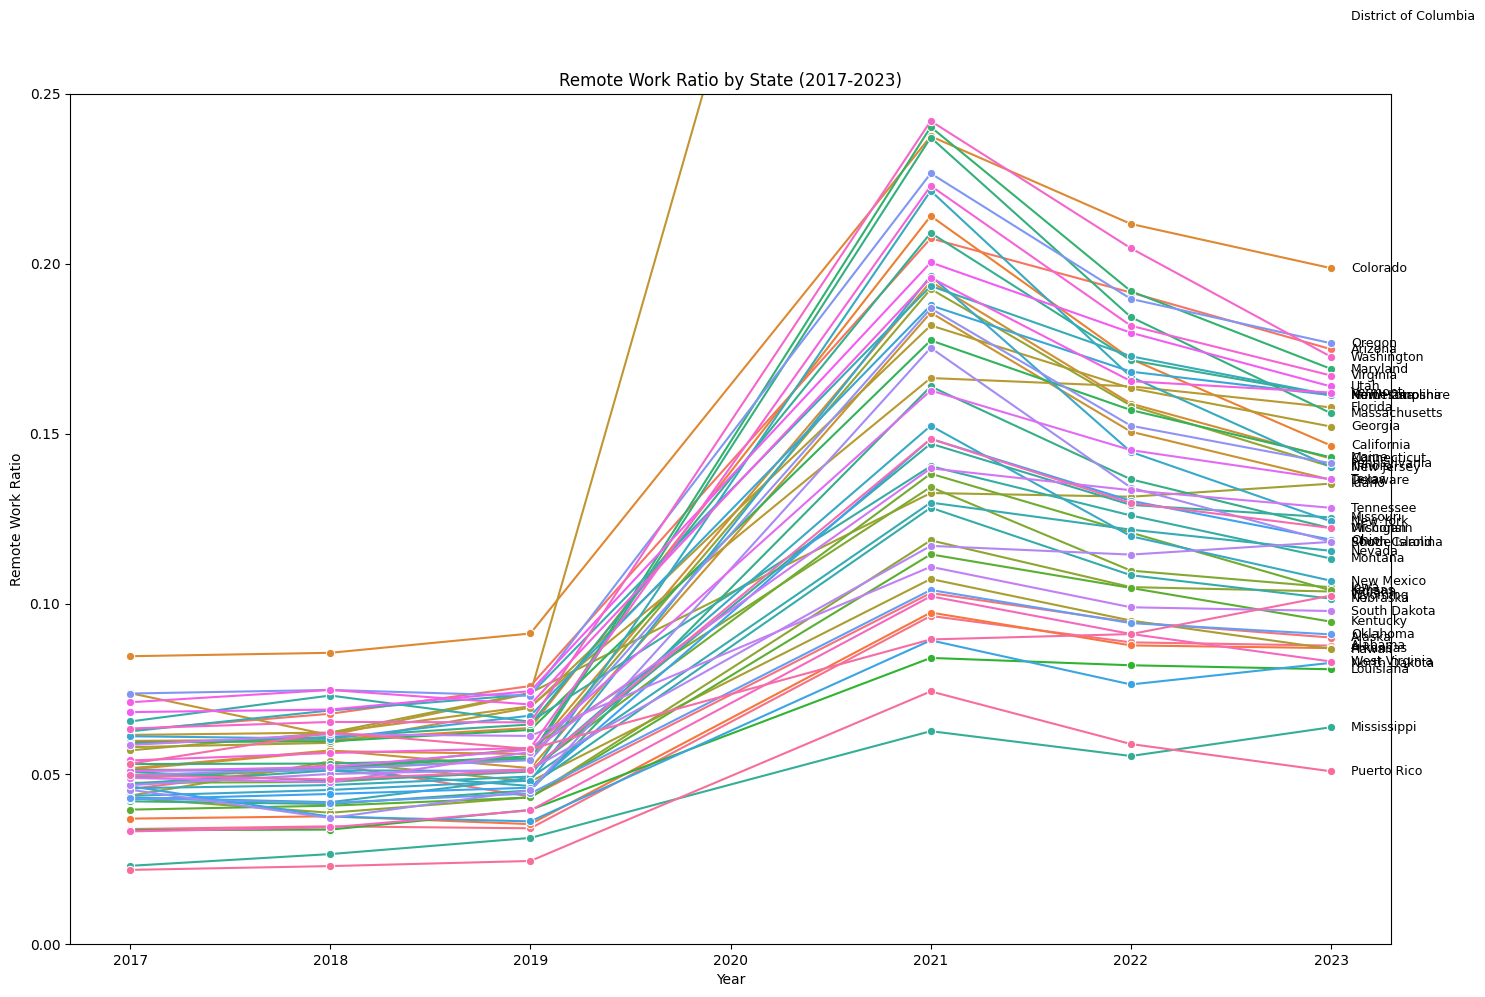

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting remote_ratio by state over the years
plt.figure(figsize=(15, 10))

sns.lineplot(data=remote_state, x='year', y='remote_ratio', hue='state', marker='o', legend=False)

for state in remote_state['state'].unique():
    # Get the data for the last year (most recent year)
    state_data = remote_state[remote_state['state'] == state]
    last_year = state_data['year'].max()

    # Get the last point for that state
    last_value = state_data[state_data['year'] == last_year]['remote_ratio'].values[0]

    # Add the text label at the rightmost point (with slight offset)
    plt.text(x=last_year + 0.1, y=last_value, s=state, fontsize=9, va='center')


# Add labels and title
plt.title('Remote Work Ratio by State (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Remote Work Ratio')
plt.ylim(0,.25)

# Show the plot
plt.tight_layout()
plt.show()


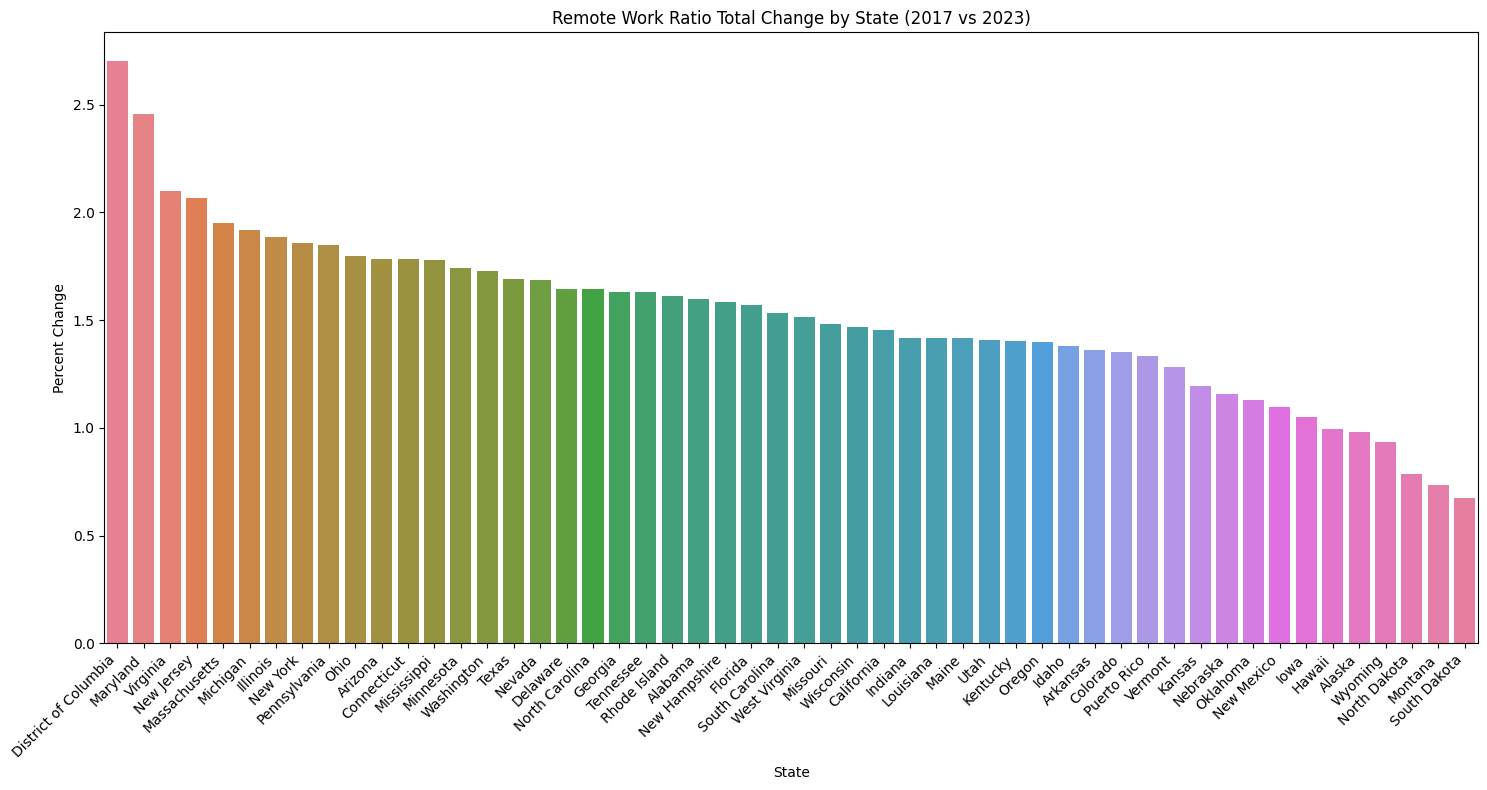

In [121]:
remote_state_byyear_sorted = remote_state_byyear.sort_values(by='total_change', ascending=False)

plt.figure(figsize=(15, 8))

# Plot the bar chart with the sorted data
sns.barplot(data=remote_state_byyear_sorted, x='state', y='total_change', hue='state')

# Add labels and title
plt.title('Remote Work Ratio Total Change by State (2017 vs 2023)')
plt.xlabel('State')
plt.ylabel('Percent Change')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()